In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Machine Learning/KNN

/content/drive/MyDrive/Machine Learning/KNN


In [4]:
%ls

breast_cancer.csv  KNN.ipynb


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [7]:
data=pd.read_csv('breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [13]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [14]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [15]:
data['diagnosis'].unique()

array([1, 0])

In [18]:
x=data.drop(['id','diagnosis'],axis=1)

In [19]:
y=data['diagnosis']

In [20]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [23]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
knn=KNeighborsClassifier(n_neighbors=20)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [27]:
y_pred=knn.predict(x_test)

In [28]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)


In [30]:
print(f'accuracy:   {accuracy} %')
print(f'precision:  {precision} %')
print(f'f1_score:   {f1} %')
print(f'recall:     {recall} %')

accuracy:   0.9473684210526315 %
precision:  0.9512195121951219 %
f1_score:   0.9285714285714286 %
recall:     0.9069767441860465 %


<Axes: >

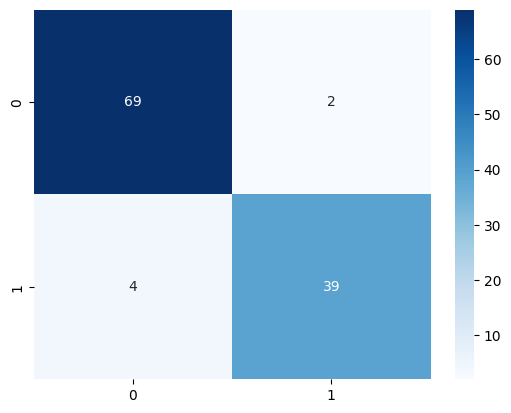

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True)